In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
df = pd.read_csv('fcc-forum-pageviews.csv',index_col='date', parse_dates=True )

In [4]:
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [4]:
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [6]:
df.loc[df.index.isna()]

,value
date,


In [7]:
df['value'].isna().values.any()

False

- Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [8]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


In [9]:
df.mean()

value    67220.683282
dtype: float64

In [5]:
df = df[
    (df['value'] >= df['value'].quantile(0.025)) &
    (df['value'] <= df['value'].quantile(0.975))
]

Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png".
- The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019".
- The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

Text(0, 0.5, 'Page Views')

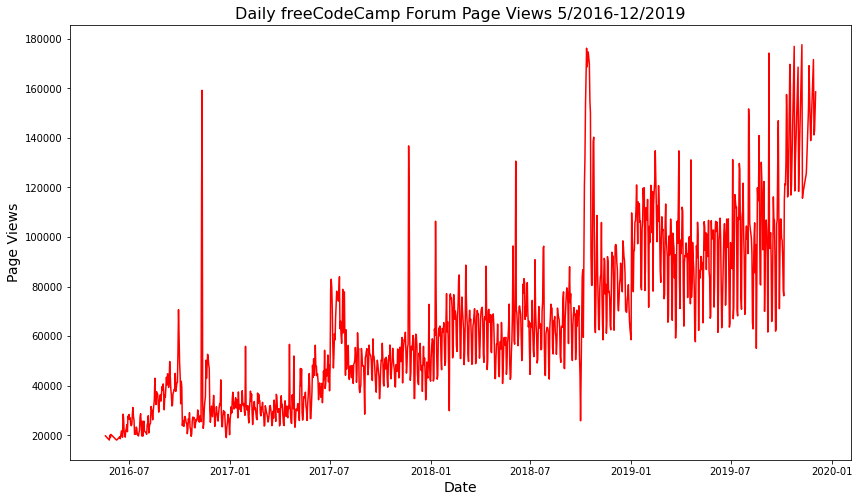

In [6]:
fig , ax = plt.subplots(figsize=(14,8),)

ax.plot(df['value'],color='red')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019',fontsize=16)
ax.set_xlabel('Date',fontsize=14)
ax.set_ylabel('Page Views',fontsize=14)

Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png".
- It should show average daily page views for each month grouped by year.
- The legend should show month labels and have a title of "Months".
- On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1238 entries, 2016-05-19 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1238 non-null   int64
dtypes: int64(1)
memory usage: 19.3 KB


In [13]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [7]:
df_bar = df.copy()

In [8]:
df_bar

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [9]:
df_bar['month'] = df.index.month

In [10]:
df_bar['year'] = df.index.year

In [11]:
df_bar

,value,month,year
date,,,
2016-05-19,19736,5,2016
2016-05-26,18060,5,2016
2016-05-27,19997,5,2016
2016-05-28,19044,5,2016
2016-05-29,20325,5,2016
...,...,...,...
2019-11-24,138875,11,2019
2019-11-29,171584,11,2019
2019-11-30,141161,11,2019


In [12]:
#ff['month']=ff['month'].astype('string')

In [44]:
df_bar2 = pd.melt(df_bar,id_vars=['month','year'],value_vars=['value'],value_name='page views')

In [45]:
df_bar2

,month,year,variable,page views
0,5,2016,value,19736
1,5,2016,value,18060
2,5,2016,value,19997
3,5,2016,value,19044
4,5,2016,value,20325
...,...,...,...,...
1233,11,2019,value,138875
1234,11,2019,value,171584
1235,11,2019,value,141161
1236,12,2019,value,142918


In [46]:
 df_bar2.drop('variable',axis='columns',inplace=True)

In [47]:
df_bar2

,month,year,page views
0,5,2016,19736
1,5,2016,18060
2,5,2016,19997
3,5,2016,19044
4,5,2016,20325
...,...,...,...
1233,11,2019,138875
1234,11,2019,171584
1235,11,2019,141161
1236,12,2019,142918


In [22]:
df_bar2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   month       1238 non-null   int64
 1   year        1238 non-null   int64
 2   page views  1238 non-null   int64
dtypes: int64(3)
memory usage: 29.1 KB


In [128]:
df_bar3 = df_bar2.groupby(['year', 'month'],as_index=False)['page views'].mean()

In [129]:
df_bar3

,year,month,page views
0,2016,5,19432.400000
1,2016,6,21875.105263
2,2016,7,24109.678571
3,2016,8,31049.193548
4,2016,9,41476.866667
5,2016,10,27398.322581
6,2016,11,40448.633333
7,2016,12,27832.419355
8,2017,1,32785.161290
9,2017,2,31113.071429


In [130]:
df_bar3['month']=pd.to_datetime(df_bar3['month'],format='%m') 

In [131]:
df_bar3

,year,month,page views
0,2016,1900-05-01,19432.400000
1,2016,1900-06-01,21875.105263
2,2016,1900-07-01,24109.678571
3,2016,1900-08-01,31049.193548
4,2016,1900-09-01,41476.866667
5,2016,1900-10-01,27398.322581
6,2016,1900-11-01,40448.633333
7,2016,1900-12-01,27832.419355
8,2017,1900-01-01,32785.161290
9,2017,1900-02-01,31113.071429


In [132]:
df_bar3['month'] = df_bar3['month'].dt.strftime('%B')

In [133]:
df_bar3

,year,month,page views
0,2016,May,19432.400000
1,2016,June,21875.105263
2,2016,July,24109.678571
3,2016,August,31049.193548
4,2016,September,41476.866667
5,2016,October,27398.322581
6,2016,November,40448.633333
7,2016,December,27832.419355
8,2017,January,32785.161290
9,2017,February,31113.071429


In [134]:
df4 = df_bar3.pivot(index='year', columns='month', values='page views')
df4

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
2016,NaN,31049.193548,27832.419355,NaN,NaN,24109.678571,21875.105263,NaN,19432.400000,40448.633333,27398.322581,41476.866667
2017,30878.733333,47712.451613,48420.580645,31113.071429,32785.161290,65806.838710,43577.500000,29369.096774,34244.290323,57701.566667,47438.709677,47376.800000
2018,62350.833333,62831.612903,80047.483871,65679.000000,58580.096774,63591.064516,70117.000000,62693.774194,56562.870968,78688.333333,111378.142857,65941.733333
2019,89368.433333,102717.310345,150733.500000,105968.357143,102056.516129,97236.566667,90435.642857,91214.483871,91439.903226,143166.428571,122802.272727,97268.833333


In [137]:
df4 = df4.reindex(['January','February','March', 'April','May','June','July','August','September','October','November','December'], axis=1)

In [203]:
df4.fillna(0,inplace=True)

In [204]:
df4

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2016,0.000000,0.000000,0.000000,0.000000,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


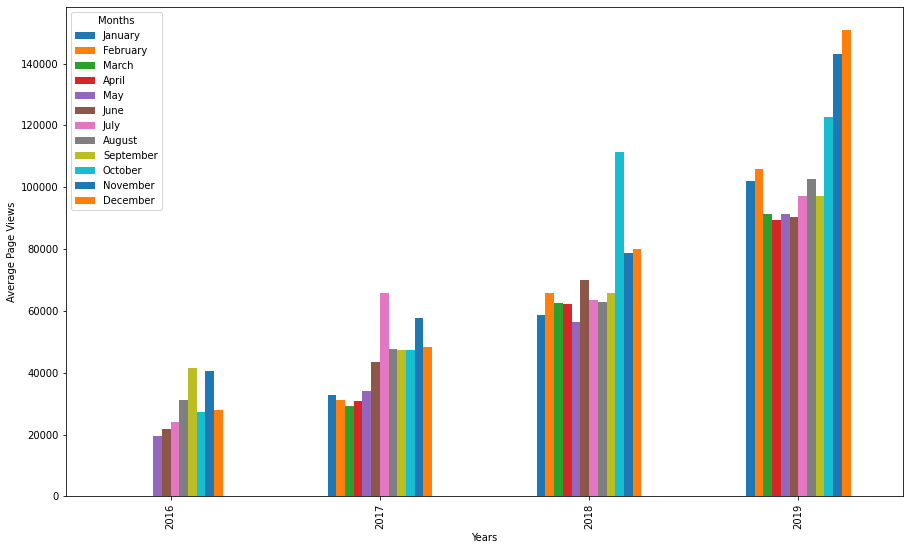

In [214]:
fig,axs= plt.subplots(figsize=(15,9))
df4.plot(ax=axs,kind='bar')
axs.set_ylabel("Average Page Views")
axs.set_xlabel('Years')
plt.legend(title='Months')

In [107]:
#df_bar4 = df_bar3.groupby(['year','month'],as_index=False)['page views'].sum()

In [108]:
#df_bar4

In [109]:
#df_bar4.info()

In [71]:
#ss['month'] = pd.to_datetime(ss['month'], format='%b')
#ss = ss.sort_values(by='month')
#ss['month'] = [d.strftime('%B') for d in df_box.date]

In [23]:
#ss['month'] = [d.strftime('%B') for d in df.index.month]

In [ ]:
#f = df.groupby([df.index.year , df.index.month])['value'].mean().to_frame()
#f

In [ ]:
#dd = pd.pivot_table(df,values='value',index=[df.index.month],columns=[df.index.year],aggfunc='mean',fill_value=0 )
#dd

In [183]:
#fig ,ax  = plt.subplots(figsize=(15,9))
#ax=sns.barplot(data=df_bar3,x='month',y='page views',hue='month',palette='pastel')
#ax.legend(labels=['January','Febraury','March','April','May','June','July','August','September','October','November','December'], title='months',loc=2)
#new_labels =['January','Febraury','March','April','May','June','July','August','September','October','November','December']
#ax = df_bar3.plot(x='month',y='page views',kind='bar')

#ax = df_bar4.plot(x='month' ,y ='page views',kind='bar')

In [ ]:

fig

---------------------------------------------------

In [ ]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

df_box['month'] = pd.to_datetime(df_box['month'], format='%b')
df_box = df_box.sort_values(by='month')
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [ ]:
df_box

In [ ]:
df_box.info()

In [ ]:
df_box

In [ ]:
figg, axs = plt.subplots(1,2,figsize=(40,15))

sns.boxplot(ax=axs[0], x=df_box['year'],y=df_box['value'])
axs[0].set_title('Year-wise Box Plot (Trend)')
axs[0].set_ylabel('page veiws')

sns.boxplot(ax=axs[1], x=df_box['month'], y=df_box['value'] )
axs[1].set_title('Month-wise Box Plot (Seasonality)')
axs[1].set_ylabel('page veiws')